In [73]:
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

In [74]:
ques_night_w_productivity = pd.read_csv('../../datas/preprocessed_questionaire/ques_night_w_productivity.csv')
ques_night_w_recover = pd.read_csv('../../datas/preprocessed_questionaire/ques_night_w_recover.csv')
ques_evening_eval = pd.read_csv('../../datas/preprocessed_questionaire/ques_evening_eval.csv')
ques_morning_bodyfatigue = pd.read_csv('../../datas/preprocessed_questionaire/ques_morning_bodyfatigue.csv')
ques_night_w_bodyfatigue = pd.read_csv('../../datas/preprocessed_questionaire/ques_night_w_bodyfatigue.csv')
ques_evening_workenga  = pd.read_csv('../../datas/preprocessed_questionaire/ques_evening_workenga.csv')
ques_evening_body_fatigue = pd.read_csv('../../datas/preprocessed_questionaire/ques_evening_body_fatigue.csv')
ques_night_w_eval = pd.read_csv('../../datas/preprocessed_questionaire/ques_night_w_eval.csv')
ques_night_w_workenga  = pd.read_csv('../../datas/preprocessed_questionaire/ques_night_w_workenga.csv')
ques_morning_dams  = pd.read_csv('../../datas/preprocessed_questionaire/ques_morning_dams.csv')
ques_evening_dams = pd.read_csv('../../datas/preprocessed_questionaire/ques_evening_dams.csv')

In [75]:
ques_all = pd.read_csv('../../datas/canact_all_preprocessed.csv')

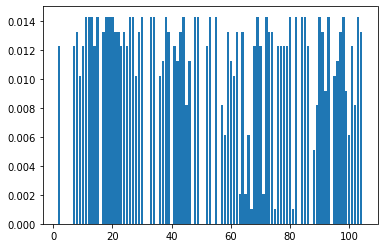

In [76]:
# ques_night_w_productivity
# ques_night_w_recover['user_id'].hist(bins=100)
tmp=ques_night_w_recover['user_id'].value_counts(normalize=True).sort_index().reset_index()
plt.bar(tmp['index'],tmp['user_id']);

In [77]:
def to_datetime_jp(x):
    x.index = pd.DatetimeIndex(x.datetime, name='datetime').tz_convert('Asia/Tokyo')
    x['datetime'] = x.index
    x = x.reset_index(drop=True)
    x['date'] = x['datetime'].dt.date
    return x
def create_date(x):
    x['datetime_jp'] = pd.to_datetime(x['datetime_jp'])
    x['date'] = x['datetime_jp'].dt.date
    return x


In [78]:
ques_morning_bodyfatigue = to_datetime_jp(ques_morning_bodyfatigue)
ques_night_w_productivity = create_date(ques_night_w_productivity)
ques_night_w_recover = create_date(ques_night_w_recover)
ques_evening_eval = create_date(ques_evening_eval)
# ques_morning_bodyfatigue = create_date(ques_morning_bodyfatigue)
# ques_morning_bodyfatigue.to_csv('../../datas/preprocessed_questionaire/ques_morning_bodyfatigue.csv')
ques_night_w_bodyfatigue = to_datetime_jp(ques_night_w_bodyfatigue)
ques_evening_workenga = create_date(ques_evening_workenga)
ques_evening_body_fatigue = to_datetime_jp(ques_evening_body_fatigue)
ques_night_w_eval = to_datetime_jp2(ques_night_w_eval)
ques_night_w_workenga = create_date(ques_night_w_workenga)
ques_morning_dams = create_date(ques_morning_dams)
ques_evening_dams = to_datetime_jp2(ques_evening_dams)

# ques_morning_bodyfatigue.to_csv('../../datas/preprocessed_questionaire/ques_morning_bodyfatigue.csv')
# ques_night_w_productivity.to_csv('../../datas/preprocessed_questionaire/ques_night_w_productivity.csv')
# ques_night_w_recover.to_csv('../../datas/preprocessed_questionaire/ques_night_w_recover.csv')
# ques_evening_eval.to_csv('../../datas/preprocessed_questionaire/ques_evening_eval.csv')
# ques_night_w_bodyfatigue.to_csv('../../datas/preprocessed_questionaire/ques_night_w_bodyfatigue.csv')
# ques_evening_workenga.to_csv('../../datas/preprocessed_questionaire/ques_evening_workenga.csv')
# ques_evening_body_fatigue.to_csv('../../datas/preprocessed_questionaire/ques_evening_body_fatigue.csv')
# ques_night_w_eval.to_csv('../../datas/preprocessed_questionaire/ques_night_w_eval.csv')
# ques_night_w_workenga.to_csv('../../datas/preprocessed_questionaire/ques_night_w_workenga.csv')
# ques_morning_dams.to_csv('../../datas/preprocessed_questionaire/ques_morning_dams.csv')
# ques_evening_dams.to_csv('../../datas/preprocessed_questionaire/ques_evening_dams.csv')

<AxesSubplot:>

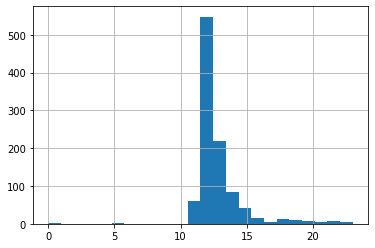

In [79]:
# def scoring_bodyfatigue(x):
#     x['nemuke_score'] = (x['nemui']+x['yoko_naritai']+x['akubi_deru']+x['yaruki_tobosii']+x['zensin_darui'])/5
#     x['hukai_score'] = (x['atama_itai']+x['atama_omoi']+x['kibun_warui']+x['atama_bonyari']+x['memai_suru'])/5
#     x['daruke_score'] = (x['ude_darui']+x['kosi_itai']+x['teyayubi_itai']+x['a'])
#     return x
def to_datetime_jp2(x):
    x.index = pd.DatetimeIndex(x.datetime_jp, name='datetime_jp').tz_convert('Asia/Tokyo')
    x['datetime_jp'] = x.index
    x = x.reset_index(drop=True)
    x['date'] = x['datetime_jp'].dt.date
    return x
pd.to_datetime(ques_night_w_eval['datetime_jp']).dt.hour.hist(bins=24)

## 夜アンケート（平日）自己評価の前処理

In [80]:
ques_w_night = ques_all.query('activity=="夜のアンケート(平日)"')
ques_w_night_eval = ques_w_night.query('(name=="業務に集中できていた")|(name=="効率的に業務ができた")|(name=="関係者と十分にコミュニケーションがとれた")|(name=="関係者と効率的にコミュニケーションがとれた")|(name=="新たなアイデアが出た")|(name=="成果に結びついた")')
ques_w_night_eval[['forcus_on_work','work_effciently','communicate_well','communicate_effectively', 'new_idea','good_results']]=100
ques_w_night_eval.loc[ques_w_night_eval['name']=='業務に集中できていた', 'forcus_on_work'] = ques_w_night_eval['value']
ques_w_night_eval.loc[ques_w_night_eval['name']=='効率的に業務ができた', 'work_effciently'] = ques_w_night_eval['value']
ques_w_night_eval.loc[ques_w_night_eval['name']=='関係者と十分にコミュニケーションがとれた', 'communicate_well'] = ques_w_night_eval['value']
ques_w_night_eval.loc[ques_w_night_eval['name']=='関係者と効率的にコミュニケーションがとれた', 'communicate_effectively'] = ques_w_night_eval['value']
ques_w_night_eval.loc[ques_w_night_eval['name']=='新たなアイデアが出た', 'new_idea'] = ques_w_night_eval['value']
ques_w_night_eval.loc[ques_w_night_eval['name']=='成果に結びついた', 'good_results'] = ques_w_night_eval['value']
ques_w_night_eval[['forcus_on_work','work_effciently','communicate_well','communicate_effectively', 'new_idea','good_results']] = ques_w_night_eval[['forcus_on_work','work_effciently','communicate_well','communicate_effectively', 'new_idea','good_results']].replace(['4: 非常にあてはまる','3: あてはまる', '2: どちらともいえない', '1: あてはまらない',
       '0: まったくあてはまらない'],[4,3,2,1,0])

<ipython-input-80-05f47b08d3e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_w_night_eval[['forcus_on_work','work_effciently','communicate_well','communicate_effectively', 'new_idea','good_results']]=100
/Users/yusuke-n/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/yusuke-n/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A va

In [81]:
ques_night_w_bodyfatigue

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,datetime,user_id,datetime_jp_before3,datetime_jp_before6,datetime_jp_before9,record_type_id,...,ude_darui,yoko_naritai,kosi_itai,asi_darui,atama_bonyari,zensin_darui,value_nemuke,value_hukai,value_boyake,date
0,0,0,0,0,2021-01-12 16:00:10+09:00,84,2021-01-12 04:00:10+00:00,2021-01-12 01:00:10+00:00,2021-01-11 22:00:10+00:00,1715.0,...,2.0,3.0,3.0,2.0,3.0,3.0,3.0,1.2,2.2,2021-01-12
1,1,1,1,1,2021-01-12 18:05:22+09:00,25,2021-01-12 06:05:22+00:00,2021-01-12 03:05:22+00:00,2021-01-12 00:05:22+00:00,1715.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.8,1.0,2021-01-12
2,2,2,2,2,2021-01-12 18:06:10.293000+09:00,99,2021-01-12 06:06:10.293000+00:00,2021-01-12 03:06:10.293000+00:00,2021-01-12 00:06:10.293000+00:00,1715.0,...,3.0,2.0,1.0,1.0,2.0,1.0,1.6,1.6,2.0,2021-01-12
3,3,3,3,3,2021-01-12 18:06:59.528000+09:00,22,2021-01-12 06:06:59.528000+00:00,2021-01-12 03:06:59.528000+00:00,2021-01-12 00:06:59.528000+00:00,1715.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,2021-01-12
4,4,4,4,4,2021-01-12 18:30:06+09:00,28,2021-01-12 06:30:06+00:00,2021-01-12 03:30:06+00:00,2021-01-12 00:30:06+00:00,1715.0,...,1.0,1.0,2.0,3.0,2.0,2.0,1.6,1.6,2.0,2021-01-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,981,981,981,981,2021-01-30 02:11:39.274000+09:00,101,2021-01-29 14:11:39.274000+00:00,2021-01-29 11:11:39.274000+00:00,2021-01-29 08:11:39.274000+00:00,1715.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-01-30
982,982,982,982,982,2021-01-30 02:31:00+09:00,72,2021-01-29 14:31:00+00:00,2021-01-29 11:31:00+00:00,2021-01-29 08:31:00+00:00,1715.0,...,0.0,2.0,0.0,0.0,1.0,0.0,1.6,1.0,0.0,2021-01-30
983,983,983,983,983,2021-01-30 07:18:22.589000+09:00,23,2021-01-29 19:18:22.589000+00:00,2021-01-29 16:18:22.589000+00:00,2021-01-29 13:18:22.589000+00:00,1715.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,2021-01-30
984,984,984,984,984,2021-01-31 03:53:00+09:00,33,2021-01-30 15:53:00+00:00,2021-01-30 12:53:00+00:00,2021-01-30 09:53:00+00:00,1715.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.8,1.0,2021-01-31


In [82]:
#timezoneを合わせる
ques_w_night_eval['datetime'] = pd.to_datetime(ques_w_night_eval['datetime'])
ques_w_night_eval = to_datetime_jp(ques_w_night_eval)
# ques_w_night_eval.to_csv('../../datas/preprocessed_questionaire/ques_w_night_eval.csv')

<ipython-input-82-ca0de1a235aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_w_night_eval['datetime'] = pd.to_datetime(ques_w_night_eval['datetime'])
<ipython-input-77-c1ef0d5b24ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['datetime'] = x.index


## それぞれの指標の確認

In [86]:
ques_morning_bodyfatigue = ques_morning_bodyfatigue[[
       'datetime', 'date', 'user_id', 'datetime_jp_before3', 'datetime_jp_before6',
       'datetime_jp_before9', 'value_nemuke', 'value_hukai', 'value_boyake']]

In [92]:
ques_morning_bodyfatigue['date'] = pd.to_datetime(ques_morning_bodyfatigue['date'])
ques_morning_bodyfatigue['hour'] = ques_morning_bodyfatigue['datetime'].dt.hour


<ipython-input-92-e113cc136d9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_morning_bodyfatigue['date'] = pd.to_datetime(ques_morning_bodyfatigue['date'])
<ipython-input-92-e113cc136d9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_morning_bodyfatigue['hour'] = ques_morning_bodyfatigue['datetime'].dt.hour


## 休日のアンケートデータを確認する

In [104]:
ques_w_night_dams = pd.read_csv('../../datas/questionaire_data/ques_night_weekday/ques_night_w_dams.csv')
ques_w_night_dams['name'].unique()

array(['はつらつとした', '暗い', '気がかりな', '嬉しい', '嫌な', '不安な', '楽しい', '沈んだ', '心配な'],
      dtype=object)

In [114]:
ques_w_night_dams[['haturatu','uresii','tanosii','kurai','iyana','sizunda','kigakari','fuan','sinpai']]=0
ques_w_night_dams.loc[ques_w_night_dams['name']=='はつらつとした', 'haturatu'] = ques_w_night_dams['value_dams']
ques_w_night_dams.loc[ques_w_night_dams['name']=='嬉しい', 'uresii'] = ques_w_night_dams['value_dams']
ques_w_night_dams.loc[ques_w_night_dams['name']=='楽しい', 'tanosii'] = ques_w_night_dams['value_dams']
ques_w_night_dams.loc[ques_w_night_dams['name']=='暗い', 'kurai'] = ques_w_night_dams['value_dams']
ques_w_night_dams.loc[ques_w_night_dams['name']=='嫌な', 'iyana'] = ques_w_night_dams['value_dams']
ques_w_night_dams.loc[ques_w_night_dams['name']=='沈んだ', 'sizunda'] = ques_w_night_dams['value_dams']
ques_w_night_dams.loc[ques_w_night_dams['name']=='気がかりな', 'kigakari'] = ques_w_night_dams['value_dams']
ques_w_night_dams.loc[ques_w_night_dams['name']=='不安な', 'fuan'] = ques_w_night_dams['value_dams']
ques_w_night_dams.loc[ques_w_night_dams['name']=='心配な', 'haturatu'] = ques_w_night_dams['value_dams']

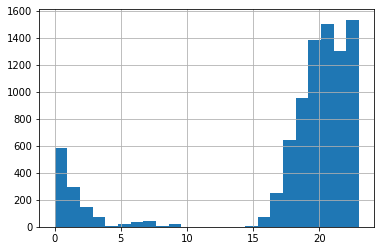

In [125]:
ques_w_night_dams['datetime'] = pd.to_datetime(ques_w_night_dams['datetime'])
ques_w_night_dams = to_datetime_jp(ques_w_night_dams)
ques_w_night_dams['datetime'].dt.hour.hist(bins=24)
ques_w_night_dams_sum = ques_w_night_dams.groupby(['date','user_id'],as_index=False).sum()

<AxesSubplot:>

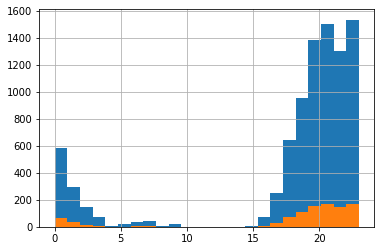

In [132]:
ques_w_night_dams['datetime'].dt.hour.hist(bins=24)
ques_night_w_bodyfatigue['datetime'].dt.hour.hist(bins=24)

In [137]:
# ques_night_w_productivity = pd.read_csv('../../datas/preprocessed_questionaire/ques_night_w_productivity.csv')

In [158]:
ques_night_w_workenga['datetime'].dt.hour.hist(bins=24)
print(len(ques_night_w_workenga))

KeyError: 'datetime'

In [179]:
# ques_night_w_productivity.to_csv('../analyse/analyse_data/questionaire_data/night_w_productivity.csv')


In [147]:
# ques_w_night_dams=ques_w_night_dams.groupby(['date','user_id'],as_index=False).sum()

In [178]:
ques_night_w_productivity

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,datetime_jp,user_id,Unnamed: 0.1.1.1.1,record_type_id,value_productivity,hour,study_new,decide_doing,paformance,absent_by_problem,datetime_jp_before3,datetime_jp_before6,datetime_jp_before9,date
0,0,0,0,0,2021-01-12 16:00:10+09:00,84,29554,554.0,10.0,64,3.0,4.0,3.0,0.0,2021-01-12 13:00:10+09:00,2021-01-12 10:00:10+09:00,2021-01-12 07:00:10+09:00,2021-01-12
1,1,1,1,1,2021-01-12 18:05:22+09:00,25,32362,554.0,9.0,72,2.0,4.0,3.0,0.0,2021-01-12 15:05:22+09:00,2021-01-12 12:05:22+09:00,2021-01-12 09:05:22+09:00,2021-01-12
2,2,2,2,2,2021-01-12 18:06:10.293000+09:00,99,32574,554.0,9.0,72,2.0,4.0,3.0,0.0,2021-01-12 15:06:10.293000+09:00,2021-01-12 12:06:10.293000+09:00,2021-01-12 09:06:10.293000+09:00,2021-01-12
3,3,3,3,3,2021-01-12 18:06:59.528000+09:00,22,32758,554.0,9.0,72,0.0,6.0,3.0,0.0,2021-01-12 15:06:59.528000+09:00,2021-01-12 12:06:59.528000+09:00,2021-01-12 09:06:59.528000+09:00,2021-01-12
4,4,4,4,4,2021-01-12 18:30:06+09:00,28,32958,554.0,4.0,72,2.0,0.0,2.0,0.0,2021-01-12 15:30:06+09:00,2021-01-12 12:30:06+09:00,2021-01-12 09:30:06+09:00,2021-01-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,974,974,974,974,2021-01-30 02:11:39.274000+09:00,101,514641,414.0,10.0,6,2.0,5.0,3.0,0.0,2021-01-29 23:11:39.274000+09:00,2021-01-29 20:11:39.274000+09:00,2021-01-29 17:11:39.274000+09:00,2021-01-30
975,975,975,975,975,2021-01-30 02:31:00+09:00,72,687026,554.0,9.0,8,2.0,3.0,4.0,0.0,2021-01-29 23:31:00+09:00,2021-01-29 20:31:00+09:00,2021-01-29 17:31:00+09:00,2021-01-30
976,976,976,976,976,2021-01-30 07:18:22.589000+09:00,23,688302,554.0,10.0,28,1.0,5.0,4.0,0.0,2021-01-30 04:18:22.589000+09:00,2021-01-30 01:18:22.589000+09:00,2021-01-29 22:18:22.589000+09:00,2021-01-30
977,977,977,977,977,2021-01-31 03:53:00+09:00,33,687438,554.0,6.0,12,2.0,2.0,2.0,0.0,2021-01-31 00:53:00+09:00,2021-01-30 21:53:00+09:00,2021-01-30 18:53:00+09:00,2021-01-31
